In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pylab as plt

In [4]:
%matplotlib inline

In [5]:
from matplotlib.pylab import rcParams

In [6]:
rcParams['figure.figsize'] = 10, 6

In [9]:
dataset = pd.read_csv(r"C:\Users\yashk\Downloads\forcasting\Airlines+Data.csv")

In [13]:
indexedDataset = dataset.set_index(['Month'])

In [14]:
from datetime import datetime

Text(0.5, 0, 'Date')

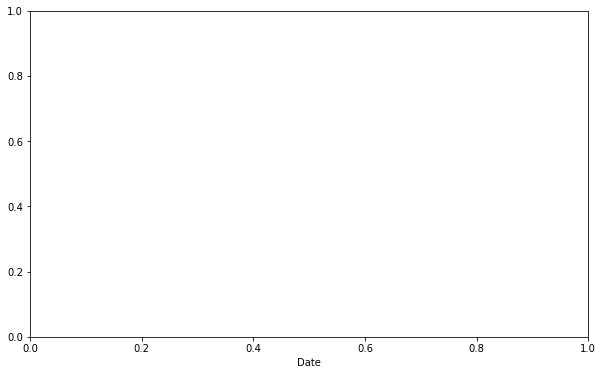

In [19]:
plt.xlabel("Date")

Text(0, 0.5, 'Number of air passengers')

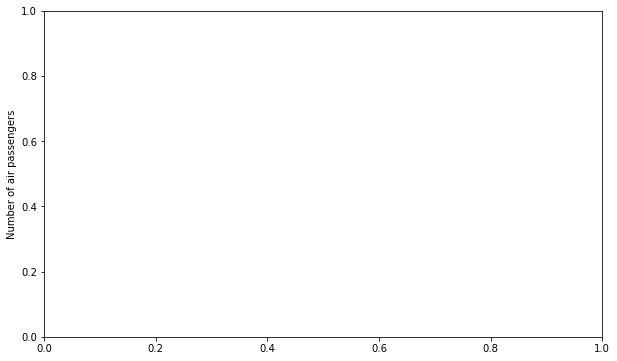

In [20]:
plt.ylabel("Number of air passengers")

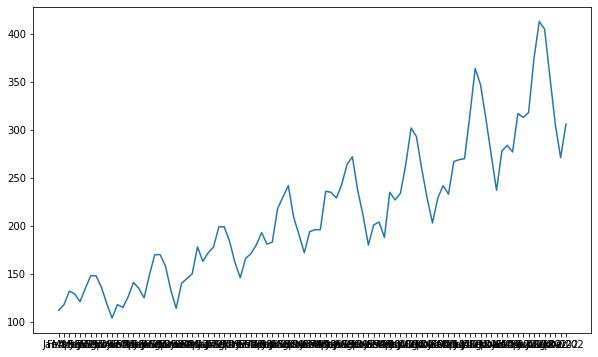

In [21]:
    plt.plot(indexedDataset)

In [22]:
rolmean = indexedDataset.rolling(window=12).mean()

In [24]:
rolstd = indexedDataset.rolling(window=12).std()


In [25]:
print(rolmean, rolstd)

        Passengers
Month             
Jan-95         NaN
Feb-95         NaN
Mar-95         NaN
Apr-95         NaN
May-95         NaN
...            ...
Aug-02  316.833333
Sep-02  320.416667
Oct-02  323.083333
Nov-02  325.916667
Dec-02  328.250000

[96 rows x 1 columns]         Passengers
Month             
Jan-95         NaN
Feb-95         NaN
Mar-95         NaN
Apr-95         NaN
May-95         NaN
...            ...
Aug-02   54.530781
Sep-02   55.586883
Oct-02   53.899668
Nov-02   49.692616
Dec-02   47.861780

[96 rows x 1 columns]


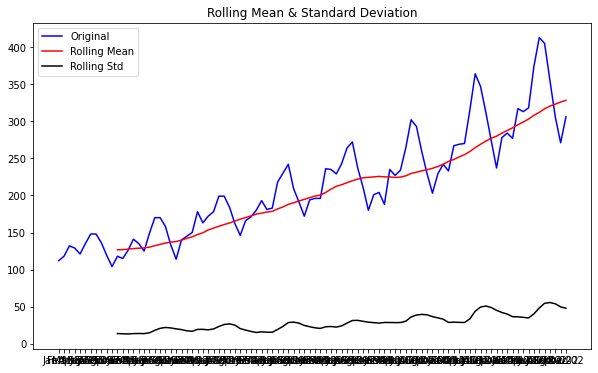

In [26]:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [27]:
from statsmodels.tsa.stattools import adfuller

In [29]:
print ('Results of Dickey-Fuller Test:')

Results of Dickey-Fuller Test:


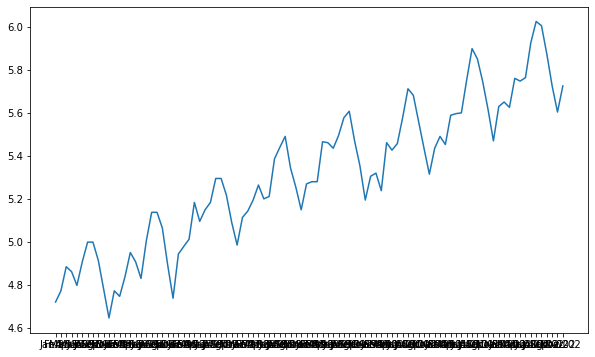

In [34]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

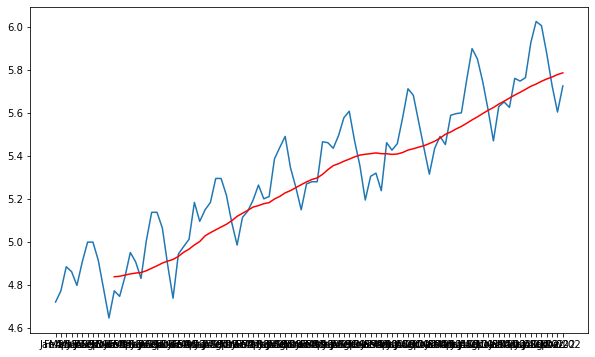

In [35]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [36]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,Passengers
Month,
Jan-95,NaN
Feb-95,NaN
Mar-95,NaN
Apr-95,NaN
May-95,NaN
Jun-95,NaN
Jul-95,NaN
Aug-95,NaN
Sep-95,NaN


In [37]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Month,
Dec-95,-0.065494
Jan-96,-0.093449
Feb-96,-0.007566
Mar-96,0.099416
Apr-96,0.052142
May-96,-0.027529
Jun-96,0.139881
Jul-96,0.260184
Aug-96,0.248635
